In [11]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/shark-tank-india-dataset/Shark Tank India Dataset.csv


In [12]:
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# Load Dataset

In [13]:
df=pd.read_csv('/kaggle/input/shark-tank-india-dataset/Shark Tank India Dataset.csv')
df

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,34,113,Green Protein,Plant-Based Protein,0,60.0,2.0,3000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000
113,34,114,On2Cook,Fastest Cooking Device,0,100.0,1.0,10000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000
114,35,115,Jain Shikanji,Lemonade,1,40.0,8.0,500.00,40.0,30.00,...,1,1,1,0,1,0,0,4,10.0,7.500000
115,35,116,Woloo,Washroom Finder,0,50.0,4.0,1250.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [14]:
df.info

<bound method DataFrame.info of      episode_number  pitch_number           brand_name  \
0                 1             1  BluePine Industries   
1                 1             2        Booz scooters   
2                 1             3  Heart up my Sleeves   
3                 2             4           Tagz Foods   
4                 2             5       Head and Heart   
..              ...           ...                  ...   
112              34           113        Green Protein   
113              34           114              On2Cook   
114              35           115        Jain Shikanji   
115              35           116                Woloo   
116              35           117         Elcare India   

                                              idea  deal  pitcher_ask_amount  \
0                                     Frozen Momos     1                50.0   
1    Renting e-bike for mobility in private spaces     1                40.0   
2                              

In [15]:
df.shape

(117, 28)

Dataset have 121 rows and 33 columns

# Checking for duplicates

In [16]:
((df.isnull().sum())*100/len(df)).sort_values(ascending=False)

episode_number           0.0
pitch_number             0.0
amount_per_shark         0.0
total_sharks_invested    0.0
ghazal_deal              0.0
peyush_deal              0.0
vineeta_deal             0.0
namita_deal              0.0
aman_deal                0.0
anupam_deal              0.0
ashneer_deal             0.0
ghazal_present           0.0
peyush_present           0.0
vineeta_present          0.0
namita_present           0.0
aman_present             0.0
anupam_present           0.0
ashneer_present          0.0
deal_valuation           0.0
deal_equity              0.0
deal_amount              0.0
ask_valuation            0.0
ask_equity               0.0
pitcher_ask_amount       0.0
deal                     0.0
idea                     0.0
brand_name               0.0
equity_per_shark         0.0
dtype: float64

Only Reject_Offer column have null values which is 28.09%

In [17]:
df.keys()

Index(['episode_number', 'pitch_number', 'brand_name', 'idea', 'deal',
       'pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount',
       'deal_equity', 'deal_valuation', 'ashneer_present', 'anupam_present',
       'aman_present', 'namita_present', 'vineeta_present', 'peyush_present',
       'ghazal_present', 'ashneer_deal', 'anupam_deal', 'aman_deal',
       'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal',
       'total_sharks_invested', 'amount_per_shark', 'equity_per_shark'],
      dtype='object')

In [18]:
df.describe()

,episode_number,pitch_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,18.735043,59.000000,0.555556,319.854709,5.188034,3852.462479,31.982915,8.963504,467.104872,0.837607,...,0.179487,0.205128,0.239316,0.188034,0.128205,0.230769,0.059829,1.230769,18.132481,5.583590
std,10.070778,33.919021,0.499041,2767.842777,3.892121,11931.601957,36.687391,13.106769,919.988864,0.370397,...,0.385410,0.405532,0.428501,0.392420,0.335756,0.423137,0.238190,1.410457,23.588682,10.803799
min,1.000000,1.000000,0.000000,0.001010,0.250000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,30.000000,0.000000,45.000000,2.500000,666.670000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,59.000000,1.000000,50.000000,5.000000,1250.000000,25.000000,3.000000,100.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,27.000000,88.000000,1.000000,80.000000,7.500000,2857.140000,50.000000,15.000000,500.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,35.000000,117.000000,1.000000,30000.000000,25.000000,120000.000000,150.000000,75.000000,6666.670000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


# No. of deals made

In [20]:
deal_counts = df['deal'].value_counts()
deal_counts

1    65
0    52
Name: deal, dtype: int64

## Deals Made vs. No Deals

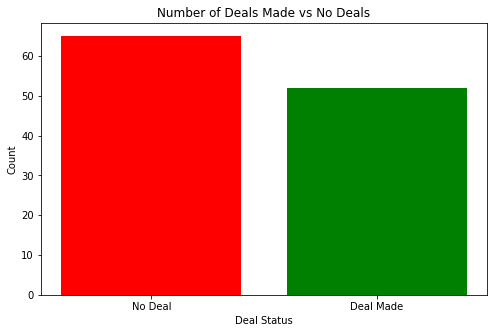

In [21]:
plt.figure(figsize=(8, 5))
plt.bar(['No Deal', 'Deal Made'], deal_counts, color=['red', 'green'])
plt.xlabel('Deal Status')
plt.ylabel('Count')
plt.title('Number of Deals Made vs No Deals')
plt.show()

## Number of Offers received in deals

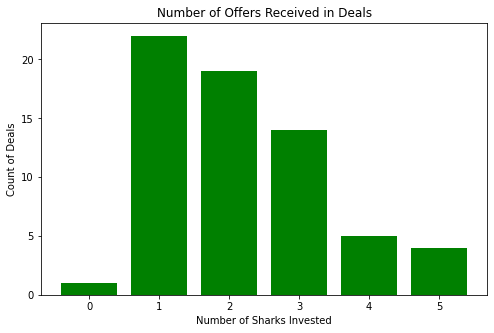

In [23]:
deals_only = df[df['deal'] == 1]

sharks_invested_counts = deals_only['total_sharks_invested'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(sharks_invested_counts.index, sharks_invested_counts.values, color='green')
plt.xlabel('Number of Sharks Invested')
plt.ylabel('Count of Deals')
plt.title('Number of Offers Received in Deals')
plt.xticks(sharks_invested_counts.index)
plt.show()

## Number Of Deals Each Shark Invested In

<Figure size 864x576 with 0 Axes>

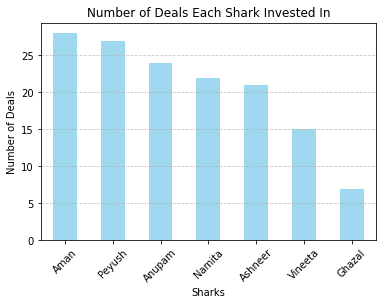

In [36]:
shark_investments = {
    'Ashneer': df['ashneer_deal'].sum(),
    'Anupam': df['anupam_deal'].sum(),
    'Aman': df['aman_deal'].sum(),
    'Namita': df['namita_deal'].sum(),
    'Vineeta': df['vineeta_deal'].sum(),
    'Peyush': df['peyush_deal'].sum(),
    'Ghazal': df['ghazal_deal'].sum()
}

shark_investment_df = pd.DataFrame.from_dict(shark_investments, orient='index', columns=['Deals Made'])

# Sort and plot
shark_investment_df.sort_values(by='Deals Made', ascending=False, inplace=True)
plt.figure(figsize=(12, 8))
shark_investment_df.plot(kind='bar', legend=False, color='skyblue', alpha=0.8)
plt.xlabel('Sharks')
plt.ylabel('Number of Deals')
plt.title('Number of Deals Each Shark Invested In')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Deals done by Sharks

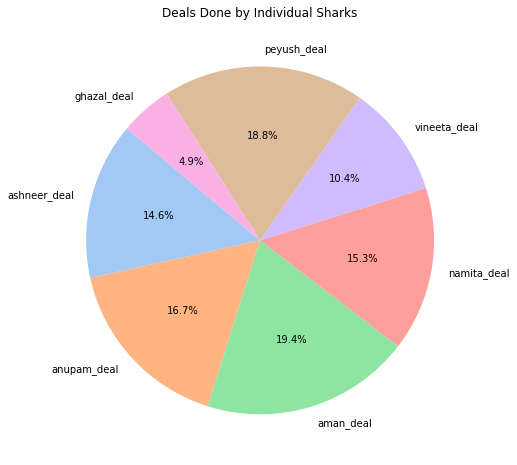

In [25]:
sharks = ['ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal']
shark_deals = df[sharks].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(shark_deals, labels=shark_deals.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Deals Done by Individual Sharks')
plt.show()

## Funding & Valuation Analysis
#### Comparison of Ask vs. Deal Amounts

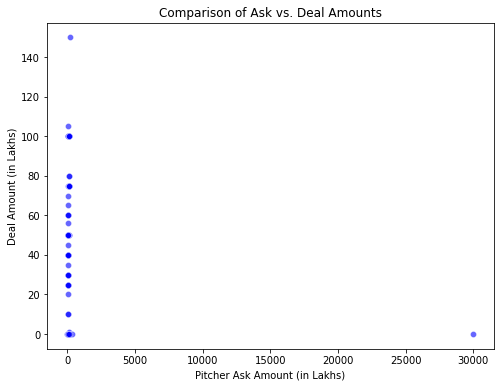

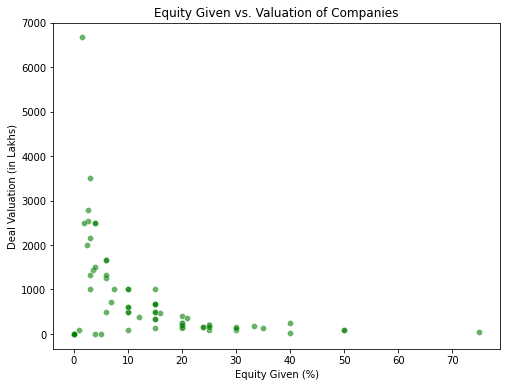

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pitcher_ask_amount'], y=df['deal_amount'], color='blue', alpha=0.6)
plt.xlabel('Pitcher Ask Amount (in Lakhs)')
plt.ylabel('Deal Amount (in Lakhs)')
plt.title('Comparison of Ask vs. Deal Amounts')
plt.show()

# Scatter plot: Equity Given vs. Valuation of Companies
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['deal_equity'], y=df['deal_valuation'], color='green', alpha=0.6)
plt.xlabel('Equity Given (%)')
plt.ylabel('Deal Valuation (in Lakhs)')
plt.title('Equity Given vs. Valuation of Companies')
plt.show()

## Number of Deals Per Episode

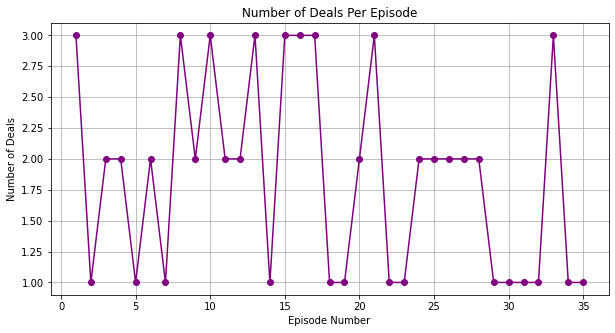

In [28]:
deals_per_episode = df.groupby('episode_number')['deal'].sum()

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(deals_per_episode.index, deals_per_episode.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Episode Number')
plt.ylabel('Number of Deals')
plt.title('Number of Deals Per Episode')
plt.grid(True)
plt.show()

## Industry-Wise Investment

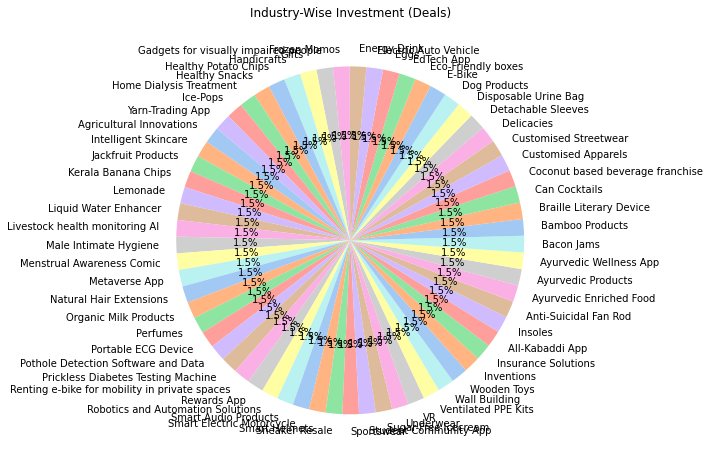

In [29]:
if 'idea' in df.columns:
    # Group by industry (idea) and count deals
    industry_deals = df[df['deal'] == 1].groupby('idea').size().sort_values(ascending=False)

    # Plot industry-wise investment (Pie Chart)
    plt.figure(figsize=(10, 8))
    plt.pie(industry_deals, labels=industry_deals.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title('Industry-Wise Investment (Deals)')
    plt.show()
else:
    print("Industry data is not available in the dataset.")

## Shark Collaboration Analysis

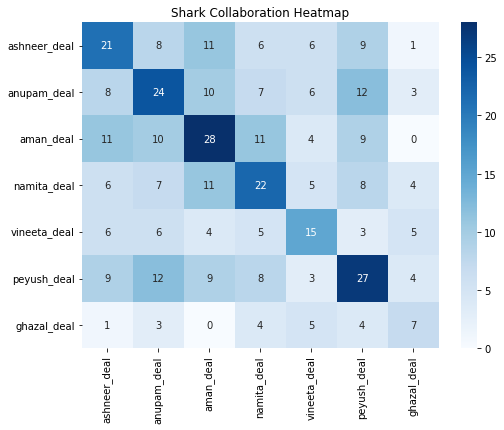

In [30]:
shark_collaboration = df[sharks].T.dot(df[sharks])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(shark_collaboration, annot=True, cmap="Blues", fmt="d")
plt.title('Shark Collaboration Heatmap')
plt.show()

## Counting the number of deals with different numbers of sharks investing

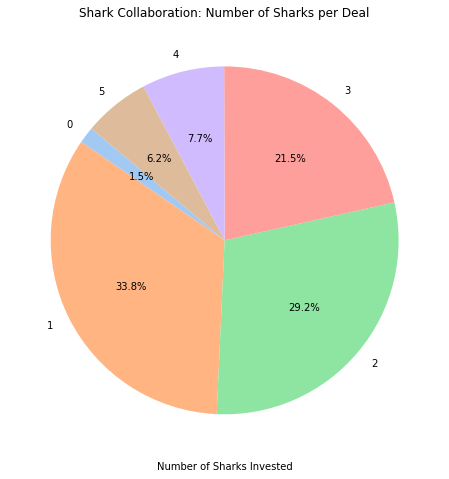

In [33]:
shark_collaboration_counts = df[df['deal'] == 1]['total_sharks_invested'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(shark_collaboration_counts, labels=shark_collaboration_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Shark Collaboration: Number of Sharks per Deal')
plt.xlabel('Number of Sharks Invested')
plt.show()

## Exploratory Data Analysis (EDA)

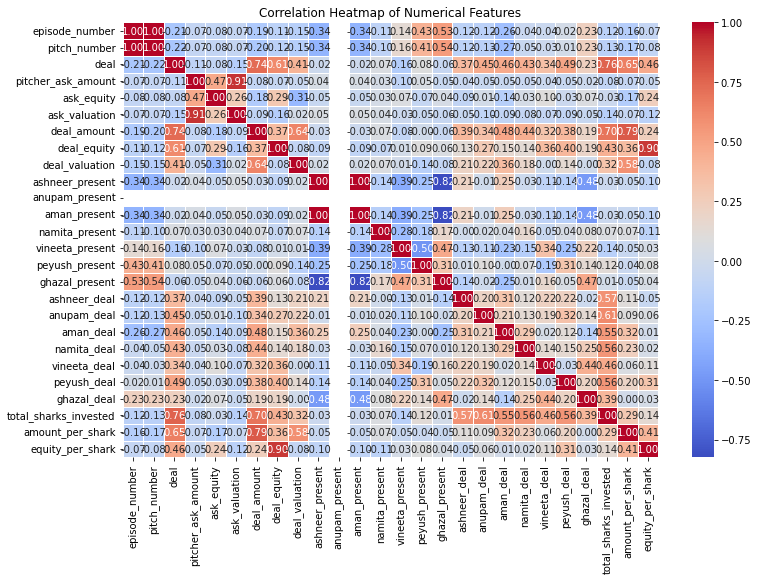

(       episode_number  pitch_number        deal  pitcher_ask_amount  \
 count      117.000000    117.000000  117.000000          117.000000   
 mean        18.735043     59.000000    0.555556          319.854709   
 std         10.070778     33.919021    0.499041         2767.842777   
 min          1.000000      1.000000    0.000000            0.001010   
 25%         10.000000     30.000000    0.000000           45.000000   
 50%         19.000000     59.000000    1.000000           50.000000   
 75%         27.000000     88.000000    1.000000           80.000000   
 max         35.000000    117.000000    1.000000        30000.000000   
 
        ask_equity  ask_valuation  deal_amount  deal_equity  deal_valuation  \
 count  117.000000     117.000000   117.000000   117.000000      117.000000   
 mean     5.188034    3852.462479    31.982915     8.963504      467.104872   
 std      3.892121   11931.601957    36.687391    13.106769      919.988864   
 min      0.250000       0.010000 

In [34]:
# Summary statistics
summary_stats = df.describe()

# Check for missing values
missing_values = df.isnull().sum()

# Count unique values in categorical columns
unique_brands = df['brand_name'].nunique()

# Count the number of deals made
deal_count = df['deal'].value_counts()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Display key statistics
summary_stats, missing_values, unique_brands, deal_count

## Predictive Modeling: Will a Pitch Get a Deal?

#### Using Random Forest ML model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


features = ['pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'total_sharks_invested']
target = 'deal'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy of the model: {accuracy:.3%}\n\n")
print("Classification Report:\n\n", classification_rep)

Accuracy of the model: 95.833%


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      1.00      0.95        10

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

